[![Fixel Algorithms](https://i.imgur.com/AqKHVZ0.png)](https://fixelalgorithms.gitlab.io/)

#  Manifold Learning - multi model compare

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 13/04/2024 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/AIProgram/2024_02/0069ManifoldLearning.ipynb)

In [1]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning
from sklearn.datasets import load_wine, load_breast_cancer, load_digits
from sklearn.manifold import TSNE, SpectralEmbedding, Isomap
from sklearn.preprocessing import StandardScaler
from umap import UMAP

# Miscellaneous
import math
import os
from platform import python_version
import random
import timeit

# Typing
from typing import Callable, Dict, List, Optional, Self, Set, Tuple, Union

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image
from IPython.display import display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout, SelectionSlider
from ipywidgets import interact

2024-05-12 10:10:10.666349: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

Code Notations:

```python
someVar    = 2; #<! Notation for a variable
vVector    = np.random.rand(4) #<! Notation for 1D array
mMatrix    = np.random.rand(4, 3) #<! Notation for 2D array
tTensor    = np.random.rand(4, 3, 2, 3) #<! Notation for nD array (Tensor)
tuTuple    = (1, 2, 3) #<! Notation for a tuple
lList      = [1, 2, 3] #<! Notation for a list
dDict      = {1: 3, 2: 2, 3: 1} #<! Notation for a dictionary
oObj       = MyClass() #<! Notation for an object
dfData     = pd.DataFrame() #<! Notation for a data frame
dsData     = pd.Series() #<! Notation for a series
hObj       = plt.Axes() #<! Notation for an object / handler / function handler
```

### Code Exercise

 - Single line fill

 ```python
 vallToFill = ???
 ```

 - Multi Line to Fill (At least one)

 ```python
 # You need to start writing
 ????
 ```

 - Section to Fill

```python
#===========================Fill This===========================#
# 1. Explanation about what to do.
# !! Remarks to follow / take under consideration.
mX = ???

???
#===============================================================#
```

In [2]:
# Configuration
# %matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# Matplotlib default color palette
lMatPltLibclr = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())


In [3]:
# Constants

FIG_SIZE_DEF    = (8, 8)
ELM_SIZE_DEF    = 50
CLASS_COLOR     = ('b', 'r')
EDGE_COLOR      = 'k'
MARKER_SIZE_DEF = 10
LINE_WIDTH_DEF  = 2


In [4]:
# Courses Packages


In [5]:
# General Auxiliary Functions


## Dimensionality Reduction

In this exercise we'll compare different methods for dimensionality reduction on real world data sets.

In this notebook:

 - We'll compare 4 methods: [`IsoMap`](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html), `t-SNE` (Implemented as [`TSNE`](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)), `Laplacian Eigenmaps` (Implemented as [`SpectralEmbedding`](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.SpectralEmbedding.html)) and `UMAP` (Implemented in the [UMAP Package](https://github.com/lmcinnes/umap)).
 - We'll use 3 different datasets: `load_wine`, `load_breast_cancer`, `load_digits`.

The `SpectralEmbedding` method is an eigen decomposition of the Laplacian Matrix of the data graph.  
It allows, similar to `t-SNE` keep the local structure of the high dimension data in the low dimension.

In [6]:
# Parameters

#===========================Fill This===========================#
# 1. Create a list of the data sets loaders / generators.
# 2. Create a list of the data sets names.
lData      = [load_breast_cancer, load_wine, load_digits]
lDataStr   = ['Breast Cancer', 'Wine', 'Digits']
#===============================================================#

#===========================Fill This===========================#
# 1. Create a list of the dimensionality reduction operators.
# 2. Create a list of the dimensionality reduction operators names.
#!! Set the parameters of the models in this phase.
lMethod    = [Isomap(n_neighbors = 10, n_components = 2), SpectralEmbedding(n_components = 2), TSNE(n_components = 2), UMAP(n_components = 2)]
lMethodStr = ['Isomap', 'Laplacian Eigenmaps', 'TSNE', 'UMAP']
#===============================================================#

# Colors
lC         = ['r', 'g', 'b', 'c']


## Analyze the Methods

/data/solai/venvMamabaFixel/lib/python3.11/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


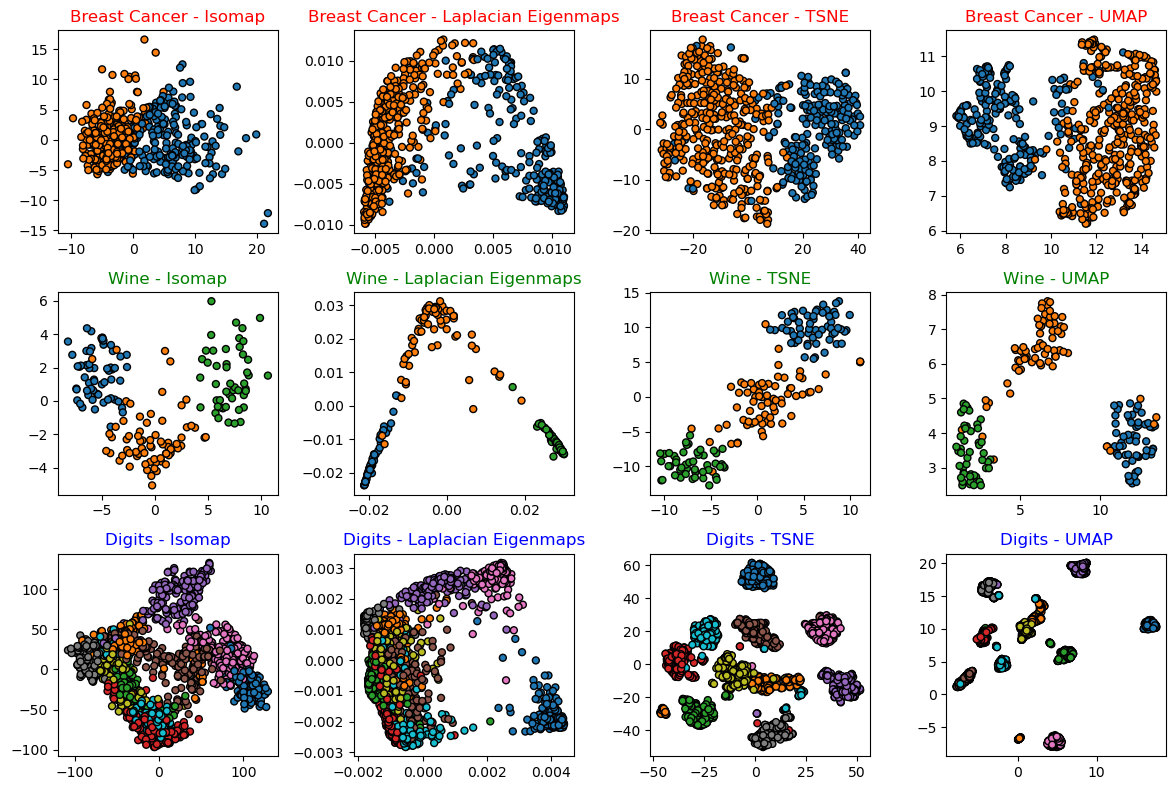

In [7]:
hF, hA = plt.subplots(nrows = len(lData), ncols = len(lMethod), figsize = (12, 8))

for ii, Data in enumerate(lData):
    mX, vY = Data(return_X_y = True)
    
    if lDataStr[ii] != 'Digits':
        mX = StandardScaler().fit_transform(mX)
    
    for jj, oMethod in enumerate(lMethod):
        mZ = oMethod.fit_transform(mX)
        
        hA[ii, jj].scatter(*mZ.T, s = 25, c = vY, edgecolor = 'k', cmap = 'tab10', vmin = -1/2, vmax = 9.5)                         
        hA[ii, jj].set_title(f'{lDataStr[ii]} - {lMethodStr[jj]}', color = lC[ii])
    
plt.tight_layout()
plt.show()

* <font color='red'>(**?**)</font> In case we're after optimization of the Hyper Parameters of the models, how would you set the score?

### use classifier to evaluate the results

* use the 2 features we got


## 2

* <font color='blue'>(**!**)</font> Try to optimize the model parameters.